In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
df = pd.read_csv('bestsellers_categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
df.rename(columns={'User Rating': 'User_Rating'}, inplace=True)

In [11]:
df.Author.value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [12]:
df[df.Author == 'J. K. Rowling']

,Name,Author,User_Rating,Reviews,Price,Year,Genre
155,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,4.9,7758,18,2019,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction


In [13]:
df[df.Author == 'J.K. Rowling']

,Name,Author,User_Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [14]:
df.loc[df.Author == 'J. K. Rowling', 'Author']  == 'J.K. Rowling'

155    False
159    False
Name: Author, dtype: bool

In [15]:
df['name_length'] = df['Name'].apply(lambda x:len(x) - x.count(" "))

In [16]:
import string

punctuations = string.punctuation

print('list of punctuations: ', punctuations)

list of punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
## percernt of punctuations 

def count_pun(text):
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(' '))*100, 3)


df['punc%'] = df['Name'].apply(lambda x: count_pun(x))

In [18]:
no_dup = df.drop_duplicates('Name')


In [19]:
g_count = no_dup['Genre'].value_counts()

In [20]:
g_count

Non Fiction    191
Fiction        160
Name: Genre, dtype: int64

Text(0.5, 0.98, 'Distribution of all Genre for all unique books from 2009 to 2019')

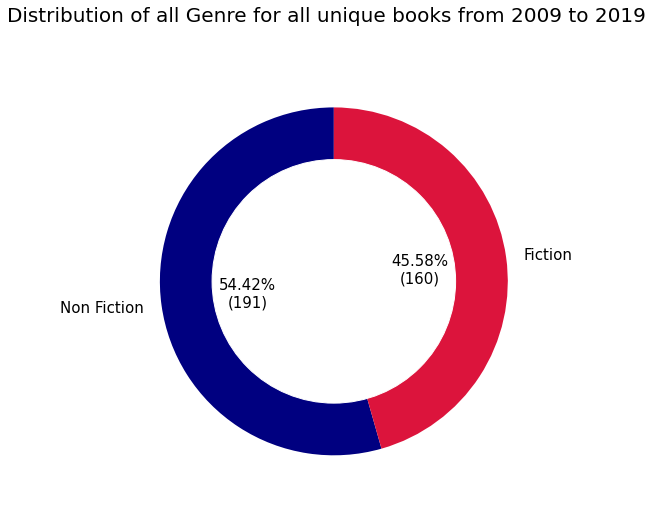

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy', 'crimson']

center_circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(x= g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values),
       startangle=90, textprops={'size':15}, pctdistance=0.5, colors=genre_col)

ax.add_artist(center_circle)

fig.suptitle('Distribution of all Genre for all unique books from 2009 to 2019', fontsize=20)


C:\Users\venka\AppData\Local\Temp/ipykernel_15676/3220708590.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


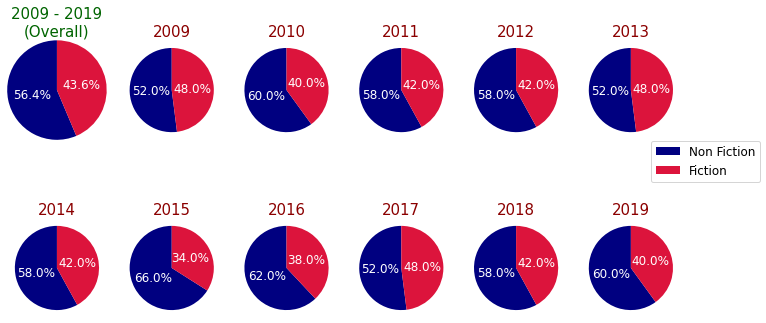

In [22]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)


g_count = df.Genre.value_counts()

fig, ax= plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
           startangle=90, textprops={'size':12, 'color':'white'}, pctdistance = 0.5,radius=1.3,colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})




for i,year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize':15} )
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                 startangle=90,textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts= df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%',
                 startangle=90,textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize':15})
    

fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

In [23]:
best_nf_authors = df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Fiction'].sort_values(ascending=False)[:11]



C:\Users\venka\AppData\Local\Temp/ipykernel_15676/2096951662.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
C:\Users\venka\AppData\Local\Temp/ipykernel_15676/2096951662.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


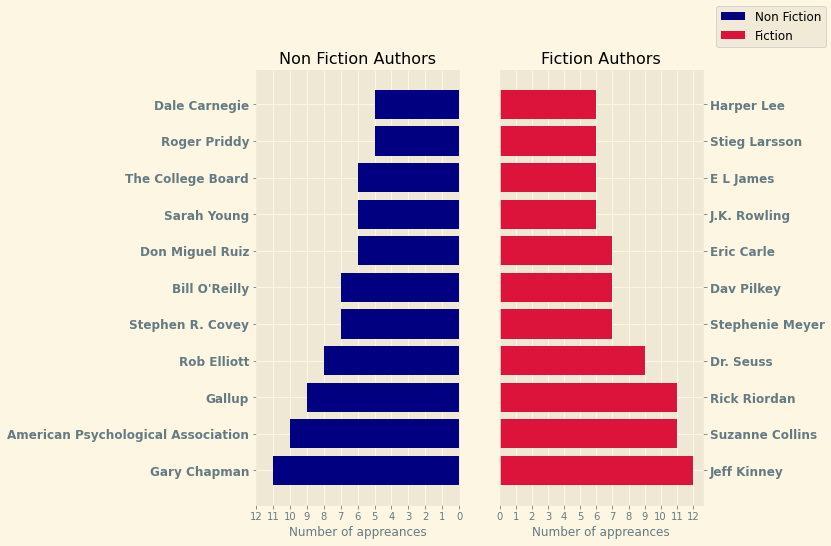

In [24]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

C:\Users\venka\AppData\Local\Temp/ipykernel_15676/1934722200.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


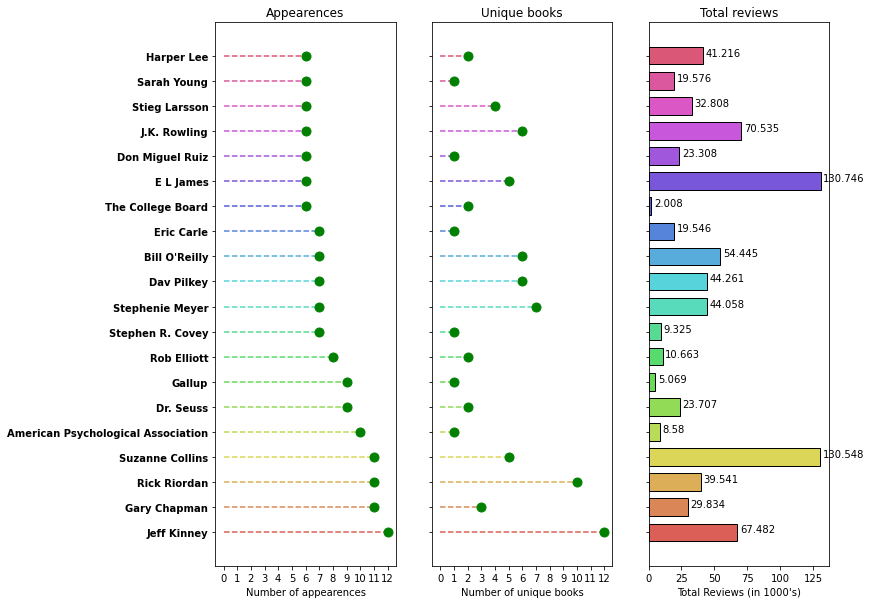

In [25]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()